In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Define which columns I want to use
features_to_use=['qtr','down','TimeSecs','yrdline100','ydstogo','posteam','PosTeamScore','DefTeamScore','PlayType']

In [3]:
all_plays=pd.read_csv('NFL Play by Play 2009-2016 (v3).csv',usecols=features_to_use)

In [4]:
# Define function to return all plays for a given team
# Removes penalties from list of plays
# Removes team name from data set we'll work with
def plays_for_team(plays,team_name):
    return plays.loc[(plays['posteam']==team_name) & \
                     (plays['PlayType'].isin(['Pass','Run'])) & \
                     ~(plays['down'].isnull()) & \
                     ~(plays['qtr']==5)].drop('posteam',axis=1)

In [5]:
team_plays=plays_for_team(all_plays,'NE') #Read in plays
team_plays_one_hot=pd.get_dummies(team_plays,columns=["down","qtr"]) # One-hot encode down and quarter

In [6]:
#Choose whether to use base or one-hot data
one_hot=1
#Split up into features and labels, and convert to numpy arrays
if one_hot:
    labels=np.array(team_plays_one_hot['PlayType'])
    team_plays_one_hot=team_plays_one_hot.drop('PlayType',axis=1)
    feature_list=list(team_plays_one_hot.columns)
    team_plays_np=np.array(team_plays_one_hot)        
else:
    labels=np.array(team_plays['PlayType'])
    team_plays=team_plays.drop('PlayType',axis=1)
    feature_list=list(team_plays.columns)
    team_plays_np=np.array(team_plays)

In [7]:
features=team_plays_one_hot.columns.get_values().tolist()

In [8]:
# Split up data into training and testing
# Since the data is chronological, will train on first 80% of data, test on last 20% of data
train_test_split=int(.8*team_plays_np.shape[0])

train_features=team_plays_np[0:train_test_split]
train_labels=labels[0:train_test_split]

test_features=team_plays_np[train_test_split:]
test_labels=labels[train_test_split:]

In [9]:
print(test_features.shape)
print(test_labels.shape)

print(train_features.shape)
print(train_labels.shape)

(1646, 13)
(1646,)
(6584, 13)
(6584,)


In [10]:
# Compute baseline -- will be percentage of run plays or pass plays, whichever's larger
num_pass=test_labels[test_labels=="Pass"].shape[0]
num_run=test_labels[test_labels=="Run"].shape[0]
baseline=max(num_pass,num_run)/float(num_pass+num_run)
print(baseline)

0.568043742406


In [11]:
# Create and train the model
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [12]:
#Predict on test data
predictions = rf.predict(test_features)

In [13]:
float(np.sum(np.equal(predictions,test_labels)))/test_labels.shape[0]

0.6573511543134872

In [14]:
#non one-hot gets accuracy of 0.652962515114873 with n=10000

In [15]:
#Find accuracy when attempting to predict a pass play
pass_plays=np.where(test_labels=="Pass")[0] #Returns indices of pass plays
sum(predictions[pass_plays]=="Pass")/float(pass_plays.shape[0])

0.7764705882352941

In [16]:
#Find accuracy when attempting to predict a run play
run_plays=np.where(test_labels=="Run")[0] #Returns indices of run plays
sum(predictions[run_plays]=="Run")/float(run_plays.shape[0])

0.5007032348804501

In [17]:
#Terrible at predicting run plays

In [18]:
#Find accuracy given prediction of a pass play
pass_plays=np.where(predictions=="Pass")[0] #Returns indices of pass plays
sum(test_labels[pass_plays]=="Pass")/float(pass_plays.shape[0])

0.6716003700277521

In [19]:
#Find accuracy given prediction of a run play
run_plays=np.where(predictions=="Run")[0] #Returns indices of run plays
sum(test_labels[run_plays]=="Run")/float(run_plays.shape[0])

0.6300884955752213

In [20]:
#Plot feature importance
importances=rf.feature_importances_
indices = np.argsort(importances)

In [22]:
indices

array([ 8,  9, 12, 11, 10,  6,  5,  7,  4,  2,  3,  1,  0])

In [23]:
importances

array([0.29742105, 0.2392744 , 0.12900376, 0.13285458, 0.12264522,
       0.01428081, 0.01183034, 0.0278921 , 0.00229334, 0.00344449,
       0.00658753, 0.00639756, 0.0060748 ])

In [24]:
[features[ind] for ind in indices]

['down_4.0',
 'qtr_1',
 'qtr_4',
 'qtr_3',
 'qtr_2',
 'down_2.0',
 'down_1.0',
 'down_3.0',
 'DefTeamScore',
 'ydstogo',
 'PosTeamScore',
 'yrdline100',
 'TimeSecs']

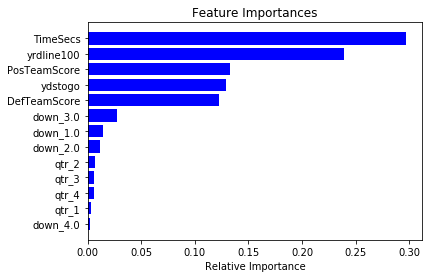

In [26]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[ind] for ind in indices])
plt.xlabel('Relative Importance')
plt.show()

In [28]:
features[]

TypeError: list indices must be integers, not list